# **01 - Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
pd.set_option("display.max_columns", None)

## **Load data (2010)**

In [ ]:
DATA_DIR = "../data/train/BAAC-Annee-2010"

characteristics = pd.read_csv(f"{DATA_DIR}/characteristics.csv", encoding="latin-1", low_memory=False)
locations = pd.read_csv(f"{DATA_DIR}/locations.csv", encoding="latin-1", low_memory=False)
vehicles = pd.read_csv(f"{DATA_DIR}/vehicles.csv", encoding="latin-1", low_memory=False)
users = pd.read_csv(f"{DATA_DIR}/users.csv", encoding="latin-1", low_memory=False)

tables = {"characteristics": characteristics, "locations": locations, "vehicles": vehicles, "users": users}

for name, df in tables.items():
    print(f"{name:20s} \u2192 {df.shape[0]:>6,} rows \u00d7 {df.shape[1]:>2} cols")

ParserError: Error tokenizing data. C error: Expected 3 fields in line 312, saw 4


## **Quick look at each table**

In [ ]:
for name, df in tables.items():
    print(f"\n{'='*60}")
    print(f"  {name.upper()}")
    print(f"{'='*60}")
    display(df.head(3))
    print(f"\nDtypes:\n{df.dtypes.value_counts().to_string()}")


  CHARACTERISTICS


,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201000000001,10,6,12,1930,1,2,1,1.0,6.0,52,71 RUE JEAN JAURES,M,0.0,0.0,590
1,201000000002,10,8,7,1000,1,2,1,1.0,6.0,477,Rue Nationale,M,5051600.0,292000.0,590
2,201000000003,10,9,11,1600,1,1,1,1.0,5.0,11,NaN,M,0.0,0.0,590



Dtypes:
int64      10
float64     4
str         2

  LOCATIONS


,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201000000001,3,39.0,NaN,NaN,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,60.0,1.0,0.0,1.0,0.0
1,201000000002,3,39.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,201000000003,3,41.0,2.0,NaN,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,61.0,1.0,0.0,1.0,0.0



Dtypes:
float64    15
int64       2
str         1

  VEHICLES


,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201000000001,0,30,0,1.0,0.0,1.0,1.0,A01
1,201000000002,0,7,0,0.0,1.0,1.0,1.0,A01
2,201000000003,0,33,0,0.0,2.0,1.0,17.0,A01



Dtypes:
int64      4
float64    4
str        1

  USERS


,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201000000001,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1976.0,A01
1,201000000002,1.0,1,1,2,5.0,11.0,0.0,0.0,0.0,1983.0,A01
2,201000000002,NaN,3,3,1,0.0,NaN,4.0,3.0,1.0,1965.0,A01



Dtypes:
float64    7
int64      4
str        1


## **Unique accidents count**

In [ ]:
print("Unique Num_Acc per table:")
for name, df in tables.items():
    print(f"  {name:20s} \u2192 {df['Num_Acc'].nunique():>6,} unique accidents")

# Check consistency: are the same accidents present across all tables?
acc_sets = {name: set(df["Num_Acc"]) for name, df in tables.items()}
common = set.intersection(*acc_sets.values())
print(f"\nAccidents common to all 4 tables: {len(common):,}")
for name, s in acc_sets.items():
    diff = s - common
    if diff:
        print(f"  {name} has {len(diff)} accident(s) not in all other tables")

Unique Num_Acc per table:
  characteristics      → 69,379 unique accidents
  locations            → 69,379 unique accidents
  vehicles             → 69,379 unique accidents
  users                → 69,379 unique accidents

Accidents common to all 4 tables: 69,379


## **Missing values analysis**

In [ ]:
for name, df in tables.items():
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    summary = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
    summary = summary[summary["missing_count"] > 0].sort_values("missing_pct", ascending=False)

    if summary.empty:
        print(f"\n{name}: no missing values")
    else:
        print(f"\n{name}: {len(summary)} column(s) with missing values")
        display(summary)


characteristics: 6 column(s) with missing values


,missing_count,missing_pct
lat,37816,54.51
long,37816,54.51
gps,37654,54.27
adr,11537,16.63
col,3,0.00
atm,3,0.00



locations: 16 column(s) with missing values


,missing_count,missing_pct
v1,69126,99.64
v2,67339,97.06
pr1,28224,40.68
pr,28108,40.51
voie,1549,2.23
lartpc,466,0.67
larrout,369,0.53
vosp,111,0.16
nbv,102,0.15
env1,71,0.10



vehicles: 4 column(s) with missing values


,missing_count,missing_pct
obs,85,0.07
obsm,51,0.04
choc,17,0.01
manv,13,0.01



users: 7 column(s) with missing values


,missing_count,missing_pct
place,13232,8.58
secu,4191,2.72
actp,240,0.16
locp,235,0.15
etatp,220,0.14
trajet,69,0.04
an_nais,53,0.03


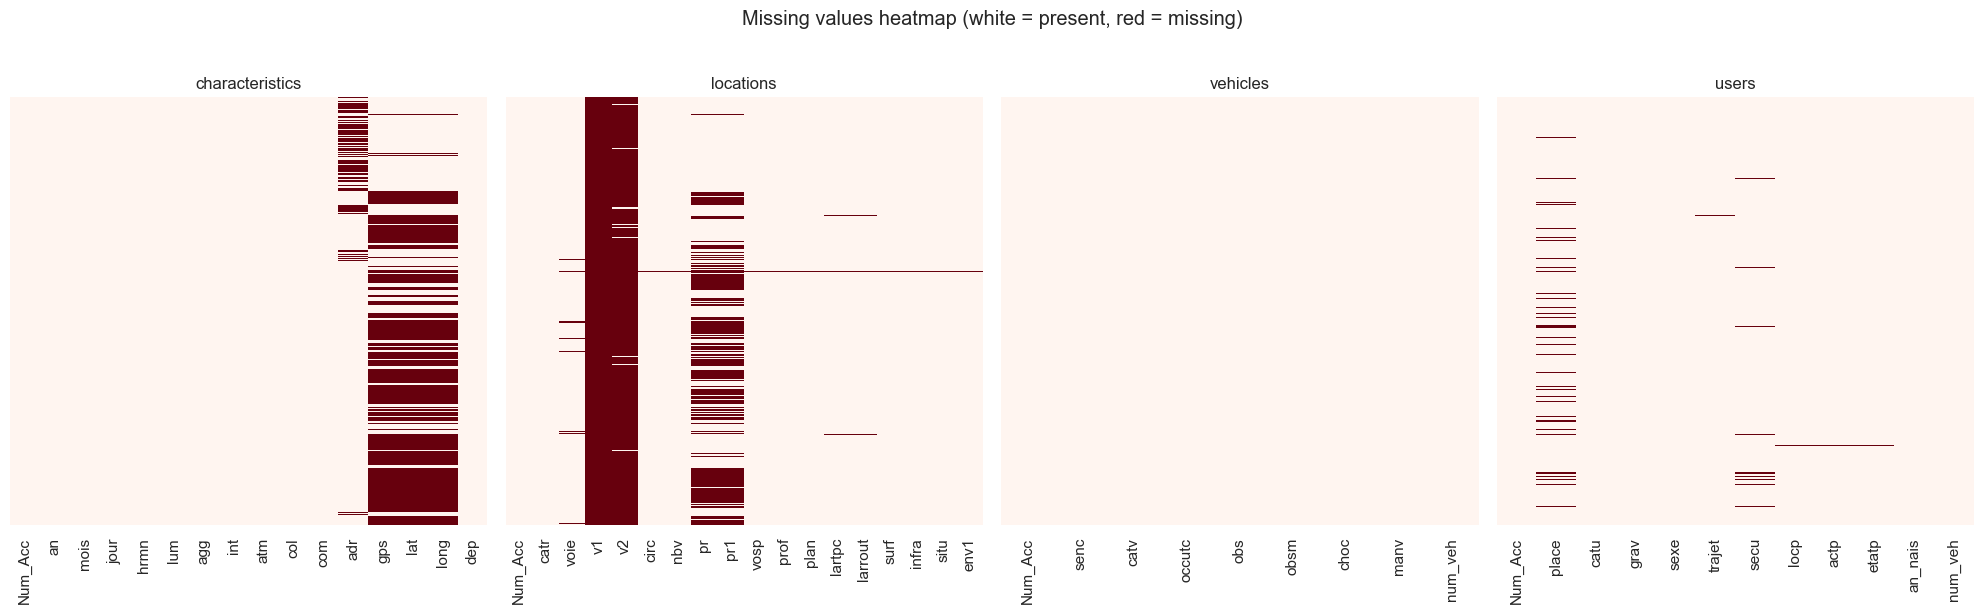

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
for ax, (name, df) in zip(axes, tables.items()):
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, ax=ax, cmap="Reds")
    ax.set_title(name)
fig.suptitle("Missing values heatmap (white = present, red = missing)", y=1.02)
plt.tight_layout()
plt.show()

## **Target variable distribution (`grav`)**

Severity levels: 1 = Unharmed, 2 = Killed, 3 = Hospitalized, 4 = Light injury

Binary target: **GRAVE = 1** if `grav` in {2, 3}, else **0**

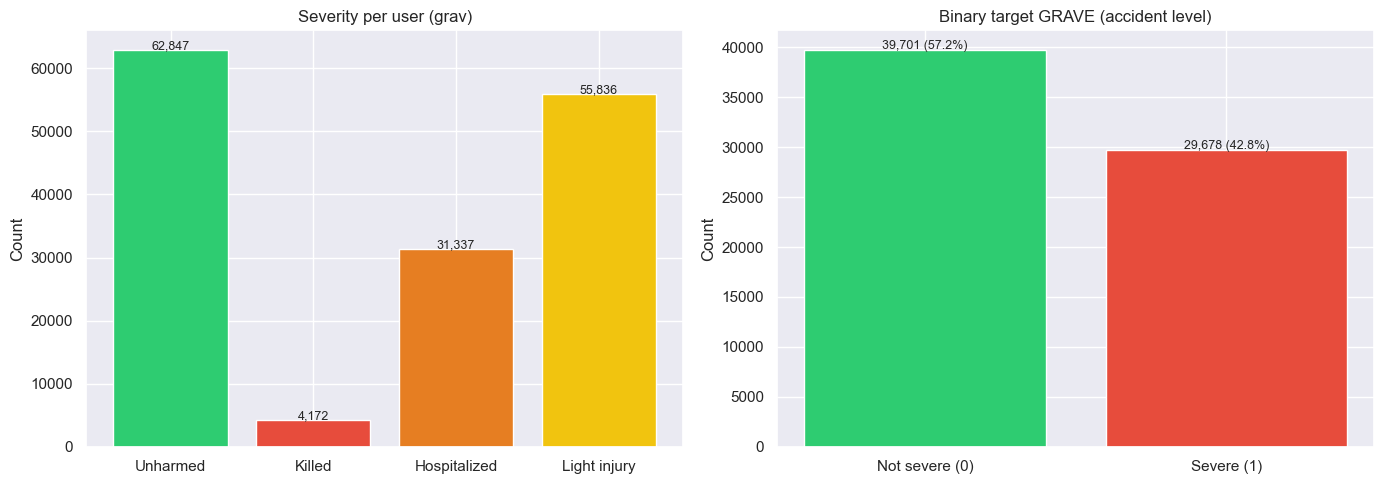

Class balance — Severe: 29,678 (42.8%) | Not severe: 39,701 (57.2%)


In [ ]:
grav_labels = {1: "Unharmed", 2: "Killed", 3: "Hospitalized", 4: "Light injury"}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Per-user severity
grav_counts = users["grav"].value_counts().sort_index()
axes[0].bar(grav_counts.index.map(lambda x: grav_labels.get(x, x)), grav_counts.values, color=["#2ecc71", "#e74c3c", "#e67e22", "#f1c40f"])
axes[0].set_title("Severity per user (grav)")
axes[0].set_ylabel("Count")
for i, v in enumerate(grav_counts.values):
    axes[0].text(i, v + 200, f"{v:,}", ha="center", fontsize=9)

# Binary target at accident level
users["GRAVE"] = users["grav"].isin([2, 3]).astype(int)
grave_per_acc = users.groupby("Num_Acc")["GRAVE"].max()
grave_counts = grave_per_acc.value_counts().sort_index()
axes[1].bar(["Not severe (0)", "Severe (1)"], grave_counts.values, color=["#2ecc71", "#e74c3c"])
axes[1].set_title("Binary target GRAVE (accident level)")
axes[1].set_ylabel("Count")
for i, v in enumerate(grave_counts.values):
    axes[1].text(i, v + 100, f"{v:,} ({v/grave_counts.sum()*100:.1f}%)", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

print(f"Class balance \u2014 Severe: {grave_counts.get(1, 0):,} ({grave_counts.get(1, 0)/grave_counts.sum()*100:.1f}%) | Not severe: {grave_counts.get(0, 0):,} ({grave_counts.get(0, 0)/grave_counts.sum()*100:.1f}%)")

## **Temporal analysis**

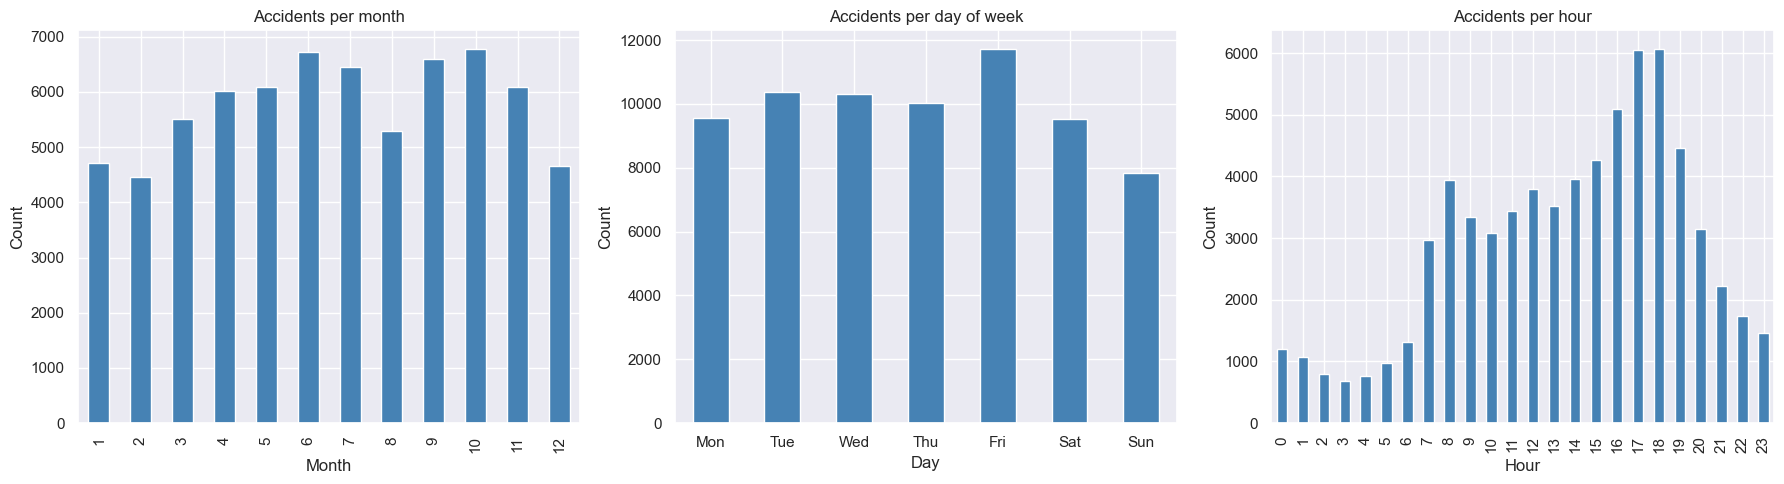

In [ ]:
characteristics["hour"] = characteristics["hrmn"].astype(str).str.zfill(4).str[:2].astype(int)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Accidents per month
characteristics["mois"].value_counts().sort_index().plot.bar(ax=axes[0], color="steelblue")
axes[0].set_title("Accidents per month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Count")

# Accidents per day of week
characteristics["date"] = pd.to_datetime(
    characteristics["an"].astype(str).str.zfill(2).apply(lambda x: "20" + x) + "-" +
    characteristics["mois"].astype(str).str.zfill(2) + "-" +
    characteristics["jour"].astype(str).str.zfill(2),
    errors="coerce"
)
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
characteristics["dow"] = characteristics["date"].dt.dayofweek
characteristics["dow"].value_counts().sort_index().plot.bar(ax=axes[1], color="steelblue")
axes[1].set_xticklabels(day_names, rotation=0)
axes[1].set_title("Accidents per day of week")
axes[1].set_xlabel("Day")
axes[1].set_ylabel("Count")

# Accidents per hour
characteristics["hour"].value_counts().sort_index().plot.bar(ax=axes[2], color="steelblue")
axes[2].set_title("Accidents per hour")
axes[2].set_xlabel("Hour")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

## **Key categorical features (characteristics)**

- `lum`: Lighting (1=Daylight, 2=Dusk/Dawn, 3=Night w/o lights, 4=Night w/ lights, 5=Night w/ lights off)
- `atm`: Weather (1=Normal, 2=Light rain, 3=Heavy rain, 4=Snow, 5=Fog, 6=Strong wind, 7=Glare, 8=Overcast, 9=Other)
- `col`: Collision type (1=Head-on, 2=Rear-end, 3=Side, 4=Chain, 5=Multiple, 6=Other, 7=No collision)

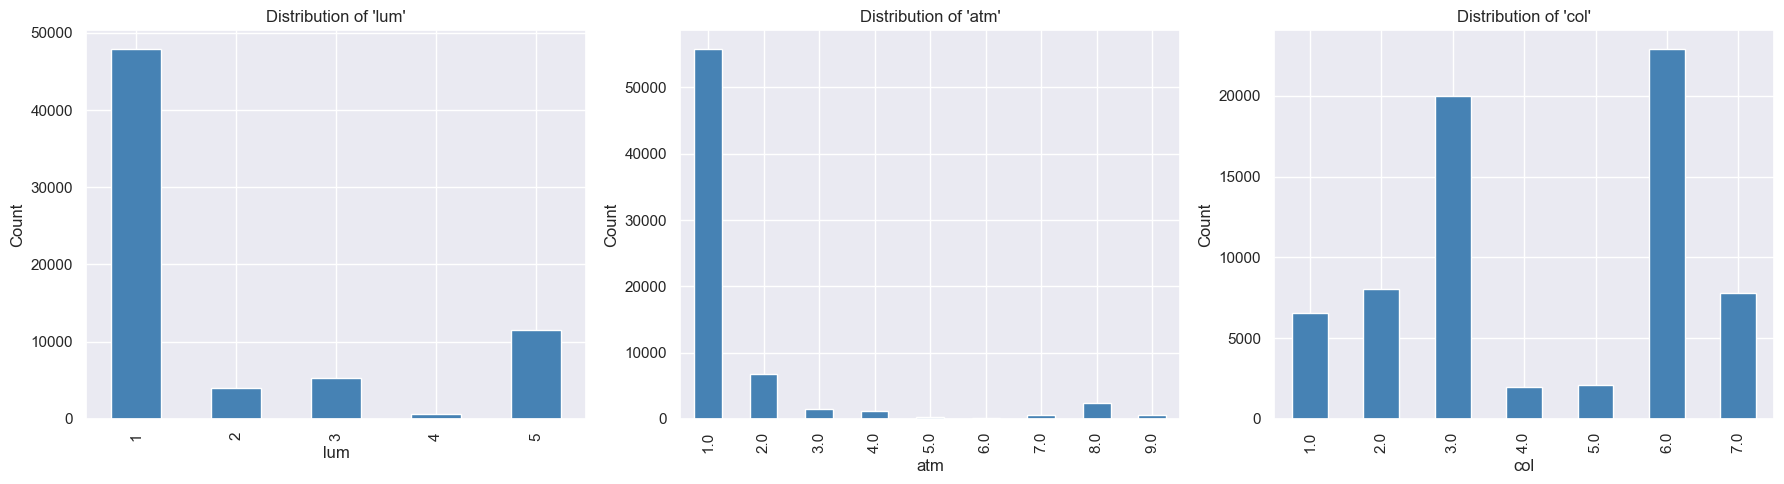

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, ["lum", "atm", "col"]):
    characteristics[col].value_counts().sort_index().plot.bar(ax=ax, color="steelblue")
    ax.set_title(f"Distribution of '{col}'")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

## **Vehicles & users per accident**

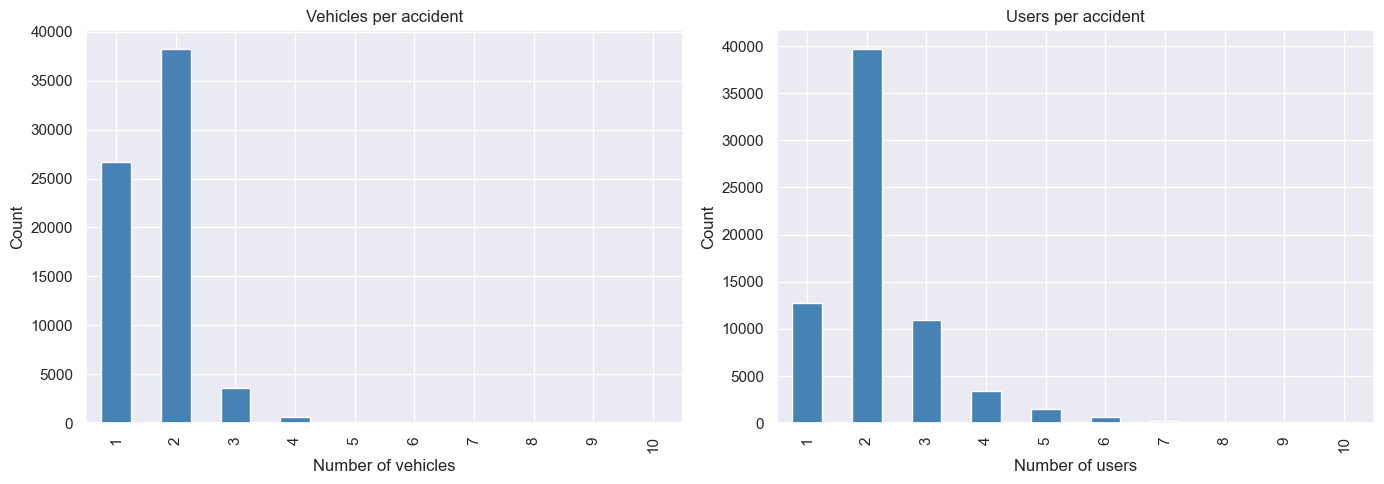

Vehicles per accident — mean: 1.70, median: 2, max: 15
Users per accident    — mean: 2.22, median: 2, max: 53


In [ ]:
veh_per_acc = vehicles.groupby("Num_Acc")["num_veh"].nunique()
usr_per_acc = users.groupby("Num_Acc")["num_veh"].count()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

veh_per_acc.value_counts().sort_index().head(10).plot.bar(ax=axes[0], color="steelblue")
axes[0].set_title("Vehicles per accident")
axes[0].set_xlabel("Number of vehicles")
axes[0].set_ylabel("Count")

usr_per_acc.value_counts().sort_index().head(10).plot.bar(ax=axes[1], color="steelblue")
axes[1].set_title("Users per accident")
axes[1].set_xlabel("Number of users")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

print(f"Vehicles per accident \u2014 mean: {veh_per_acc.mean():.2f}, median: {veh_per_acc.median():.0f}, max: {veh_per_acc.max()}")
print(f"Users per accident    \u2014 mean: {usr_per_acc.mean():.2f}, median: {usr_per_acc.median():.0f}, max: {usr_per_acc.max()}")

## **Severity rate by key features**

Merge characteristics with the binary target to see which conditions lead to more severe accidents.

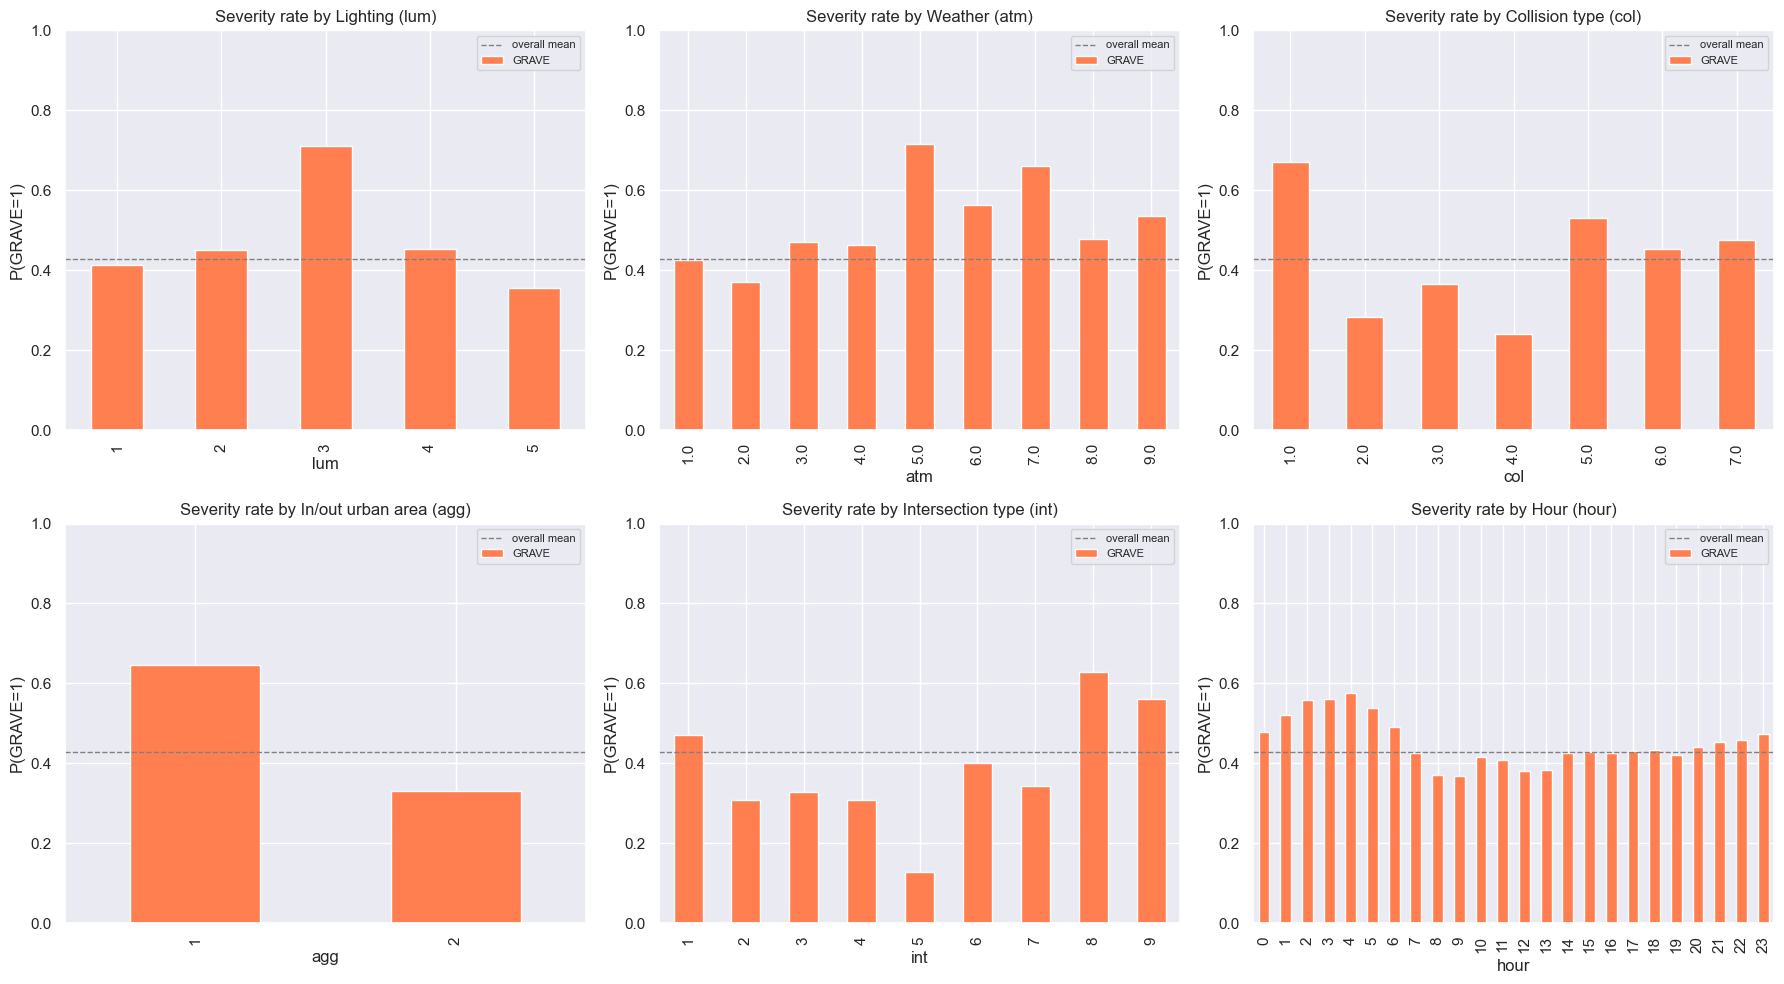

In [ ]:
carac_target = characteristics.merge(grave_per_acc.rename("GRAVE"), on="Num_Acc")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

features = [
    ("lum", "Lighting"),
    ("atm", "Weather"),
    ("col", "Collision type"),
    ("agg", "In/out urban area"),
    ("int", "Intersection type"),
    ("hour", "Hour"),
]

for ax, (feat, title) in zip(axes.flat, features):
    severity_rate = carac_target.groupby(feat)["GRAVE"].mean().sort_index()
    severity_rate.plot.bar(ax=ax, color="coral")
    ax.set_title(f"Severity rate by {title} ({feat})")
    ax.set_ylabel("P(GRAVE=1)")
    ax.set_ylim(0, 1)
    ax.axhline(y=carac_target["GRAVE"].mean(), color="grey", linestyle="--", linewidth=1, label="overall mean")
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

## **User demographics**

- `catu`: User category (1=Driver, 2=Passenger, 3=Pedestrian)
- `sexe`: Gender (1=Male, 2=Female)
- `an_nais`: Birth year

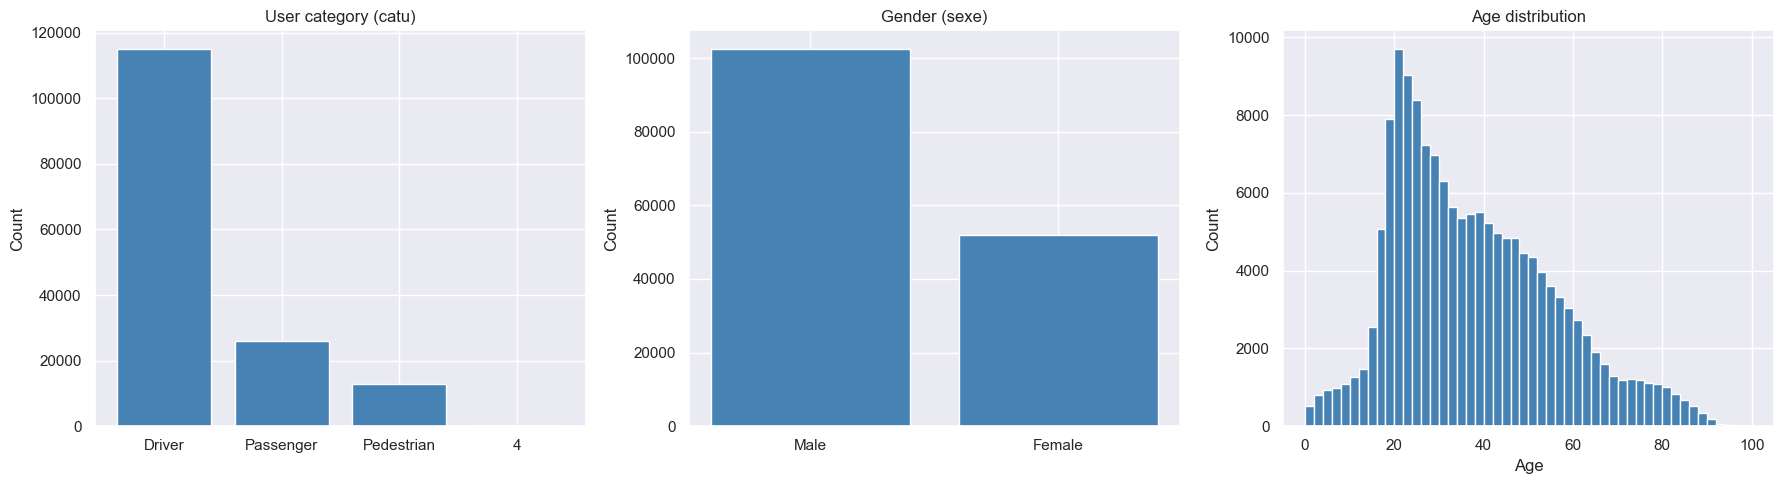

Severity rate by user category:
  Driver       → 20.50%
  Passenger    → 25.70%
  Pedestrian   → 39.81%

Severity rate by gender:
  Male         → 23.77%
  Female       → 21.57%


In [ ]:
users["age"] = 2010 - users["an_nais"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# User category
catu_labels = {1: "Driver", 2: "Passenger", 3: "Pedestrian"}
catu_counts = users["catu"].value_counts().sort_index()
axes[0].bar([catu_labels.get(x, str(x)) for x in catu_counts.index], catu_counts.values, color="steelblue")
axes[0].set_title("User category (catu)")
axes[0].set_ylabel("Count")

# Gender
sexe_labels = {1: "Male", 2: "Female"}
sexe_counts = users["sexe"].value_counts().sort_index()
axes[1].bar([sexe_labels.get(x, str(x)) for x in sexe_counts.index], sexe_counts.values, color="steelblue")
axes[1].set_title("Gender (sexe)")
axes[1].set_ylabel("Count")

# Age distribution
users["age"].clip(0, 100).plot.hist(bins=50, ax=axes[2], color="steelblue", edgecolor="white")
axes[2].set_title("Age distribution")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Severity rate by user category and gender
print("Severity rate by user category:")
for cat, label in catu_labels.items():
    rate = users[users["catu"] == cat]["GRAVE"].mean()
    print(f"  {label:12s} \u2192 {rate:.2%}")

print("\nSeverity rate by gender:")
for s, label in sexe_labels.items():
    rate = users[users["sexe"] == s]["GRAVE"].mean()
    print(f"  {label:12s} \u2192 {rate:.2%}")